# Notebook setup

The first code cell of most of the notebooks from here on out will contain a `data_folder` variable that you need to change to match your computer.

In [ ]:
data_folder = r'C:\Users\tyler\Desktop\Teaching\Python\GEOG_4860\Week_3\data'

The next cell will do some general setup, like import `arcpy`, set `overwriteOutput = True`, and set the workspace to `data_folder` so that it can find the datasets for this week. You saw code like this in the Intro to ArcPy notebook.

This cell will also import `classtools`, which is a module that Chris wrote to use with the notebooks and doesn't come with Python or ArcGIS. Instead, it's in your data folder, which isn't a standard place for Python to look for modules so there's an extra step required in order to import it. You'll also have to do this same step in future weeks.

`%matplotlib inline` configures the plotting module so that plots will display in the notebook.

In [ ]:
import os
import sys

# Import the classtools module that we'll use for plotting data. We have to do the sys.path.append
# business because classtools is not in a standard location for Python to find modules. This tells
# it where to find it.
sys.path.append(data_folder)

import classtools

import arcpy

arcpy.env.workspace = data_folder
arcpy.env.overwriteOutput = True

%matplotlib inline

# Creating spatial reference objects

In the Intro notebook you learned the basics of how to use ArcGIS's geoprocessing tools, but some tools require inputs that aren't simple strings or numbers. Spatial references are one of these data types. If you store a spatial reference object in a variable, you can then ask it things about itself, such as its name. 

It might help to think of items like strings and numbers as pieces of paper, and objects such as spatial references as filing cabinets that can hold lots of strings and numbers (pieces of paper). You'll work with a lot of data types that are stored as objects-- spatial references are just one of many.

[SpatialReference](https://pro.arcgis.com/en/pro-app/arcpy/classes/spatialreference.htm) objects hold information about a spatial reference system (SRS), including the projection and datum specifications. The available data include:

- Type of SRS (projected or geographic)
- Projected:
    - SRS name (e.g. NAD_1983_UTM_Zone_12N)
    - Projection name (e.g. Transverse_Mercator)
    - Projection parameters, such as false easting, central meridian, and linear units
    - Underlying geographic coordinate system
- Geographic
    - SRS name (e.g. GCS_North_American_1983)
    - Geographic coordinate system name (e.g. GCS_North_American_1983)
    - Datum name (e.g. D_North_American_1983)
    - Datum parameters, such as longitude of prime meridian
    - Spheroid name (e.g. GRS_1980)

## Loading from a .prj file

You're probably familiar with `.prj` files because they're what shapefiles use to store their spatial reference information. Delete a shapefile's `.prj` and it no longer knows what coordinate system it uses.

You can load spatial reference information from an existing `.prj` file, but it ignores the `arcpy.env.workspace` setting so you need to provide the full path (don't ask me why-- ask Esri!). Change this so it loads `2-arcpy-intro\data\cities.prj` on **your** computer.

In [ ]:
# Load the .prj file into a spatial reference object. DON'T FORGET TO CHANGE THE PATH.
srs = arcpy.SpatialReference(r'C:\Users\tyler\Desktop\Teaching\Python\GEOG_4860\Week_3\data\cities.prj')

# Print out the spatial reference name.
print(srs.name)

## Loading from a geodataset

Remember [`Describe()`](https://pro.arcgis.com/en/pro-app/arcpy/functions/describe.htm) from the Intro notebook? You can use it on a geodataset (shapefile, feature class in a geodatabase, raster, etc.) and then use the [`spatialReference`](https://pro.arcgis.com/en/pro-app/arcpy/functions/dataset-properties.htm) property on the object loaded by `Describe()`. Unlike using a `.prj` file, arcpy will look in the current workspace when you use `Describe()`.

In [ ]:
# No need to provide the path this time because Describe uses the
# arcpy.env.workspace. Notice that now we're using the .shp file, 
# not the .prj file.
srs = arcpy.Describe('cities.shp').spatialReference

# Print out the spatial reference name.
print(srs.name)

## Loading with a name or factory code

If you know the name or factory code that Esri uses to identify a particular SRS, then you can use that to create a spatial reference object. 

Using a name is my least favorite method because figuring out the correct one to use can be difficult. But here's an example for the "NAD 1983 UTM Zone 12N" SRS:

In [ ]:
# Create a SRS using the name.
srs = arcpy.SpatialReference('NAD 1983 UTM Zone 12N')

# Print out the spatial reference name.
print(srs.name)

Factory codes are numbers that represent a SRS. and  like a name, each one refers to a particular SRS. The code for the "NAD 1983 UTM Zone 12N" SRS is 26912.

In [ ]:
# Create a SRS using the factory code (WKID).
srs = arcpy.SpatialReference(26912)

# Print out the spatial reference name.
print(srs.name)

Fortunately you don't have to guess at what code to use, because Esri publishes lists of spatial reference systems at [projected_coordinate_systems.pdf](https://pro.arcgis.com/en/pro-app/arcpy/classes/pdf/projected_coordinate_systems.pdf) and [geographic_coordinate_systems.pdf](https://pro.arcgis.com/en/pro-app/arcpy/classes/pdf/geographic_coordinate_systems.pdf). The WKID column is the one you're after. Let's create a spatial reference object from the first entry in Table 2 of projected_coordinate_systems.pdf, Abidjan_1987_TM_5_NW.

In [ ]:
srs = arcpy.SpatialReference(2165)
print(srs.name)

You can also use the name, but you have to remove the underscores. I've run into examples where the name doesn't work, however, so I prefer the numeric code (plus, it's less work because there's less typing and no underscores to remove!).

In [ ]:
arcpy.SpatialReference('Abidjan 1987 TM 5 NW').name

# Getting information from spatial references

No matter which method you used to get the spatial reference object, you can still use it the same way. You've seen how to get the name, but let's look at a small subset of the other properties.

In [ ]:
# Create the SRS using the WKID.
srs = arcpy.SpatialReference(26912)

# Print out some information about it.
print('SRS name:', srs.name)
print('Projection name:', srs.projectionName)
print('Factory code:', srs.factoryCode)
print('Type:', srs.type)
print('False easting:', srs.falseEasting)
print('Linear units:', srs.linearUnitName)

That was a projected coordinate system, but you can get the underlying geographic coordinate system with the `GCS` property. This returns another spatial reference object, but this one specifies the datum information.

In [ ]:
# Get the geographic coordinate system (datum) from the SRS.
gcs = srs.GCS

# Print out some information about it.
print('GCS name:', gcs.name)
print('Datum name:', gcs.datumName)
print('Factory code:', gcs.factoryCode)
print('Type:', gcs.type)
print('Spheroid name:', gcs.spheroidName)
print('Semi-major axis:', gcs.semiMajorAxis)
print('Angular units:', gcs.angularUnitName)

## Problem 1

Create a spatial reference object using the factory code (WKID) of 3857. Print out the name of this spatial reference system.

*(This is the spatial reference system used by online maps, such as Google Maps.)*

# Using spatial references

Once you have a spatial reference object, you can use it as input to geoprocessing tools that want a spatial reference. Let's try using the [Project](https://pro.arcgis.com/en/pro-app/tool-reference/data-management/project.htm) tool to reproject the cities shapefile to a geographic coordinate system. Here's the syntax, but follow the [documentation link](https://pro.arcgis.com/en/pro-app/tool-reference/data-management/project.htm) to read about the different parameters.

```
Project(in_dataset, out_dataset, out_coor_system, {transform_method}, {in_coor_system}, 
        {preserve_shape}, {max_deviation}, {vertical})
```

That should really be called `Project_management`.

The examples in this section will reproject cities.shp from NAD83 UTM 12N to the USGS Albers projection. In case you're not familiar with this, it's commonly used for datasets that span the 48 contiguous states in the US. It also uses the NAD83 datum, so we won't have to worry about a datum transformation. Its code is 102039.

The workspace is already set to the correct folder, so you don't need to use full paths to the shapefiles.

## Objects

Let's use a spatial reference object for the first example, since we've been talking a lot about that. All you need to do is use the factory code to create the spatial reference object, and then pass that object as the `out_coor_system` parameter to the tool.

In [ ]:
# Create a spatial reference object using the USGS Albers WKID.
albers = arcpy.SpatialReference(102039)

# Reproject cities.shp to cities.shp using the Albers SRS.
arcpy.Project_management('cities.shp', 'cities_albers.shp', albers)

Now let's ask the new shapefile about its SRS, just to make sure it worked.

In [ ]:
# Load the SRS from the new shapefile.
srs = arcpy.Describe('cities_albers.shp').spatialReference

# Print out some info about it.
print(srs.type)
print(srs.name)
print(srs.GCS.name) # datum

It looks like it did exactly what we wanted.

## WKID

You don't always need the spatial reference as an object (like to get its name or units), and many times when using geoprocessing tools you can simplify things by using the WKID or a filename instead of creating an object. 

This uses the WKID of the Albers SRS in order to do the same reprojection as the example above.

In [ ]:
arcpy.Project_management('cities.shp', 'cities_albers2.shp', 102039)

## Filenames

If you already have a dataset that uses the spatial reference you want, you can use the name of that dataset as the `out_coor_system` parameter. This next example does that and uses the shapefile that you just created (cities_albers2.shp) to specify the output spatial reference system.

In [ ]:
arcpy.Project_management('cities.shp', 'cities_albers3.shp', 'cities_albers2.shp')

You could also use a `.prj` file instead of a dataset name, but in that case you need to provide the full path to the file.

In [ ]:
arcpy.Project_management('cities.shp', 'cities_albers4.shp', 
                         r'C:\Users\tyler\Desktop\Teaching\Python\GEOG_4860\Week_3\data\cities_albers2.prj')

I'm not sure you've seen parameters on two lines before. It's a bad idea to make your lines of code so long that you have to scroll to see the end, but fortunately you can break the parameters up into two or more lines like I did in that example.

## Problem 2

Reproject cities_albers2.shp back to NAD_1983_UTM_Zone_12N. I don't care which method you use or what you call the output file, as long as you don't overwrite the original cities.shp shapefile. After reprojecting, get and print out the name of the spatial reference from your new file.

# Plotting the data

This doesn't have anything to do with spatial references specifically, but you can use the classtools module to plot the original and new shapefiles and see how they've changed. The shape still looks the same in this case, but look at the numbers on the axes in order to see that the coordinates have changed. 

*(Please ignore the warning message that will probably show up. I need to update classtools to reflect the new behavior of the plotting library it uses, but I don't feel the need right this second since it still works!)*

In [ ]:
# Plot the original UTM dataset.
classtools.plot('cities.shp')

The reprojected one will have different numbers along the axes, because it uses a different coordinate system.

In [ ]:
# Plot the Albers dataset.
classtools.plot('cities_albers.shp')

## Spatial reference representations

You've seen how Esri represents spatial references, but you may (or may not) be interested to know that there are multiple ways to identify spatial reference systems. One extremely common way is EPSG codes (in fact, many of Esri's factory codes are the same as the EPSG code for that SRS). You can look up spatial references and see the various ways to specify them at http://spatialreference.org/. 

As an example, check out [EPSG:26912](http://spatialreference.org/ref/epsg/26912/). Want to see an extremely cryptic way of identifying that spatial reference system? Click on the USGS link in the gray box. Conversely, check out the GML format for something extremely long. If you've ever wondered what's in a `.prj` file, follow the ESRI WKT (Well Known Text) link. `.prj` files are actually just text files that you can open in any text editor, and that's what's inside of them.

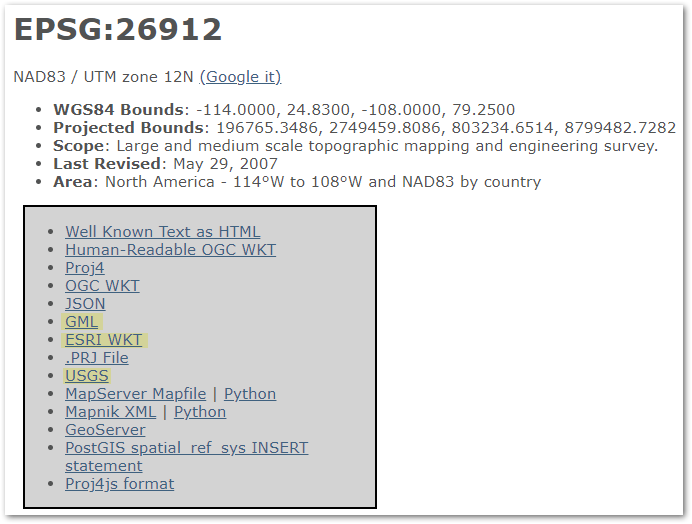

**Make sure you've saved your notebook!**